# Human Resourse Management - Reasons why Employees Quit Work.

In this project, we will identify why employees resign. This will be aided by the analysis of survey data from employees of [Department of Education,Training and Employment (DETE)](https://en.wikipedia.org/wiki/Department_of_Education_(Queensland)) and  Technical and Further Education (TAFE) institute in Queensland, Australia.

Given these data sets, we are faced with answering the following questions:

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?


* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

# Data definition - For the REAME.md file.

1) Preview of some columns for the data set [DETE](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey);
    
* `ID`: An id used to identify the participant of the survey
* `SeparationType`: The reason why the person's employment ended
* `Cease Date`: The year or month the person's employment ended
* `DETE Start Date`: The year the person began employment with the DETE

2) Next up is a couple colums we will use from **TAFE** institute;


* `Record ID`: An id used to identify the participant of the survey
* `Reason for ceasing employment`: The reason why the person's employment ended
* `LengthofServiceOverall`. Overall Length of Service at Institute (in years): The length of the person's employment (in years)



In [1]:
# Import Necessary liabraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Reading the two csv files into pandas
dete_survey = pd.read_csv('datasets/dete_survey.csv', na_values = 'Not Stated') # values represented as `Not Stated` will now be shown as NaN
tafe_survey = pd.read_csv('datasets/tafe_survey.csv')

## Inspecting the Nature of the data files

* It is our interest to critically inspect the data sets to see any preliminary observations.

* We will start with the `dete_survey` data set

In [3]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [4]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 5
Classification                         367
Region                                 105
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

* It is seen here that there are too many columns than needed for our analysis.


In [5]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


* Let us briefly look at some columns we are interested in, that is `ID`, `SeparationType`, `Cease Date`, `DETE Start Date`, `Job dissatisfaction`, `Age`

In [6]:
dete_survey['SeparationType'].value_counts(dropna = False)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64

In [7]:
dete_survey['Job dissatisfaction'].value_counts(dropna = False)

False    733
True      89
Name: Job dissatisfaction, dtype: int64

In [8]:
dete_survey['Age'].value_counts(dropna = False)

61 or older      222
56-60            174
51-55            103
46-50             63
41-45             61
26-30             57
36-40             51
21-25             40
31-35             39
NaN               11
20 or younger      1
Name: Age, dtype: int64

## Initial Observation for `DETE` data set

* So many columns have missing values so much that some are almost empty, for example `Aboriginal`, `Torres Strait `, `South Sea`.

* **Department of Education,Training and Employment (DETE)** is mostly made up of workers who are  aged **61 or older**

* Other reasons account for most employee resignation other than Job dissatisafaction as clearly seen from  `Job dissatisfaction` frequency table.

## Inspecting the Nature of the `TAFE` data files

In [9]:
tafe_survey.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate oppo

* Columns renaming is highly needed, they are too long for comprehension. This will be accomplished later on in our analysis.

* As well, the colums are too many  for our analysis, we shall extract just the ones we need. This will be done later on in our analysis journey.

In [10]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [11]:
tafe_survey.isnull().sum().values

array([  0,   0,   0,   7,   1, 265, 265, 265, 265, 265, 265, 265, 265,
       265, 265, 265, 265, 589,  94,  89,  92,  94,  87,  95,  88,  94,
        92, 100, 101, 105, 101,  93,  97,  95,  92,  89,  93,  93,  94,
        94,  91,  92,  91,  96,  92,  93,  99,  96,  83, 270, 219, 262,
       147, 147, 147, 172, 147, 149, 147, 147, 147,  94, 108, 115, 116,
       121, 106, 106, 106, 106, 106, 106], dtype=int64)

* This data set contains more null values than the previous one. Data set contains just **702** rows but some columns got up to `589` null values.

* There are some columns that are of more interest to us in the exploration such as `Record ID`, `Reason for ceasing employment`, `Contributing Factors. Dissatisfaction`, ` CurrentAge. Current Age`, `LengthofServiceOverall`, `LengthofServiceOverall. Overall Length of Service at Institute (in years)`,`Main Factor. Which of these was the main factor for leaving? `

In [12]:
tafe_survey['Reason for ceasing employment'].value_counts(dropna = False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: Reason for ceasing employment, dtype: int64

In [13]:
tafe_survey['CurrentAge. Current Age'].value_counts(dropna = False)

56 or older      162
NaN              106
51-55             82
41  45            80
46  50            59
31  35            52
36  40            51
26  30            50
21  25            44
20 or younger     16
Name: CurrentAge. Current Age, dtype: int64

In [14]:
tafe_survey['Contributing Factors. Dissatisfaction'].value_counts(dropna = False)

-                                         371
NaN                                       265
Contributing Factors. Dissatisfaction      66
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [15]:
tafe_survey['LengthofServiceOverall. Overall Length of Service at Institute (in years)'].value_counts(dropna = False)

Less than 1 year      147
NaN                   106
1-2                   102
3-4                    96
11-20                  89
More than 20 years     71
5-6                    48
7-10                   43
Name: LengthofServiceOverall. Overall Length of Service at Institute (in years), dtype: int64

## Initial Observation for `TAFE` data set

* `340` employees quit through resignation, this is followed by `127` who quit due to contract expiration.

* People aged  `51 or older` are more involved in quiting.

* Many people resign within just a year of employment.


## Cleaning data - removing unwanted columns 

In [16]:
dete_survey_updated = dete_survey.drop(columns = dete_survey.columns[28:49], axis = 1)#axis = 1 to remove columns

tafe_survey_updated = tafe_survey.drop(columns = tafe_survey.columns[17:66], axis = 1)

As we earlier notified, our data had a lot of columns that are almost needless in our  findings. So we have simply gotten rid of them.  This is purposefully to make both data sets easier to handle for the sake of this analysis.

It was also observed that there is a need for renaming the columns. This will both simplify the process of combining the data sets and making it more readable. So we will now update column names.

In [17]:
 dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [18]:
 dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(" ", "_")

In [19]:
#Use dictionary where keys are old titles and values are the new titles
rename = { 'Record ID': 'id',
          'CESSATION YEAR': 'cease_date',
          'Reason for ceasing employment': 'separationtype',
          'Gender. What is your Gender?': 'gender',
         'CurrentAge. Current Age': 'age',
          'Employment Type. Employment Type': 'employment_status',
          'Classification. Classification': 'position',
          'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
          'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
         }

tafe_survey_updated = tafe_survey_updated.rename(rename,axis=1) # axis = 1 so that we manipulate column names

In [20]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [21]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


* Some columns initially had very long and clumsy names, example `'LengthofServiceOverall. Overall Length of Service at Institute (in years)'` this not friendly as far as column naming is concerned.

* `SeperationType` has many variations, that is to say, there are several unique reasons why users quit their jobs, example; **Health issues, transfer, termination** but in this project we will focus on **Resignation variation**.

## Filtering Data

We now filter our data to retain only data involving resignation cases for both datasets.

In [22]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [23]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [24]:
"""
df.copy()  will be used so that changes made should not reflect in the 
original data set.
"""
dete_resignations = dete_survey_updated.copy()['separationtype'].str.contains('Resignation')
dete_resignations = dete_survey_updated.copy()[dete_resignations]

dete_resignations['separationtype'].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [25]:
tafe_resignations = tafe_survey_updated.copy()['separationtype'].str.contains('Resignation',na = False) #na = False replaces any NaN value with False
tafe_resignations = tafe_survey_updated.copy()[tafe_resignations]

tafe_resignations['separationtype'].value_counts()

Resignation    340
Name: separationtype, dtype: int64




Let us now check for logical consistency of our data sets. We will make use of the `cease_date` and `dete_start_date ` to make sure that dates don not appear to be very far behind or appear after the current date.

We start this process by cleaning the these columns in the two data sets for a comprehensive comparison.

In [26]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

In [27]:
# In DETE dataset, extract the year from the `cease_date` column and covert the value to float
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1].astype(float)

In [28]:
dete_resignations['cease_date'].value_counts(dropna=False)

2013.0    146
2012.0    129
2014.0     22
NaN        11
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [29]:
dete_resignations['dete_start_date'].value_counts(dropna=False)

NaN       28
2011.0    24
2008.0    22
2012.0    21
2007.0    21
2010.0    17
2005.0    15
2004.0    14
2006.0    13
2009.0    13
2013.0    10
2000.0     9
1999.0     8
1994.0     6
2003.0     6
1992.0     6
1996.0     6
1998.0     6
2002.0     6
1990.0     5
1997.0     5
1980.0     5
1993.0     5
1989.0     4
1991.0     4
1988.0     4
1995.0     4
1986.0     3
2001.0     3
1985.0     3
1983.0     2
1976.0     2
1974.0     2
1975.0     1
1984.0     1
1971.0     1
1982.0     1
1972.0     1
1963.0     1
1977.0     1
1973.0     1
1987.0     1
Name: dete_start_date, dtype: int64

In [30]:
tafe_resignations['cease_date'].value_counts(dropna=False)

2011.0    116
2012.0     94
2010.0     68
2013.0     55
NaN         5
2009.0      2
Name: cease_date, dtype: int64

Now that all the required date columns are in the required type **(year as floats)**. Let us use boxplots to vividly explore these columsn. 

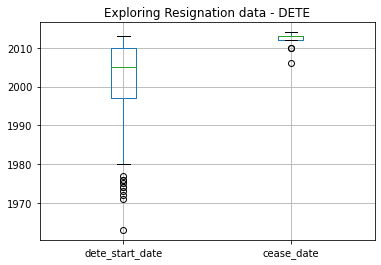

In [31]:
dete_resignations.boxplot(column = ['dete_start_date', 'cease_date'])

plt.title("Exploring Resignation data - DETE");

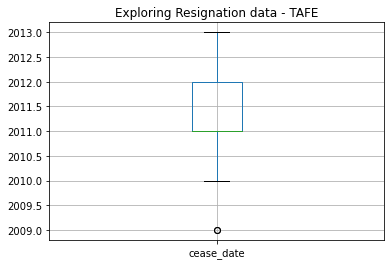

In [32]:
tafe_resignations.boxplot(column = [ 'cease_date'])
plt.title("Exploring Resignation data - TAFE");

* There is no major issue with most of the year columms in both data frames

* However, it is clearly seen that start of service dates in `dete_resignations` before the year **1978** are indicating to be outliers. We will get rid of them just to make sure that our analysis is improved.

In [33]:
dete_resignation_updated  = dete_resignations.copy()[dete_resignations['dete_start_date'] > 1978]

## Calculating Service Duration For DETE

* To achieve the goal of this analysis, we will need to get the duration of an employee in the institute, also called **years of service**.

* As noticed the `tafe_resignations` data frame has no `dete_start_date` but rather has a `institute_service` colunm which depicts for **years of service** for each employee.

* Getting a column for the `dete_resignation_updated` also named `institute_service` will make the data frames uniform and anable us calculate the employee **years of service** for this data frame.

In [65]:
dete_resignation_updated['institute_service '] =dete_resignations['cease_date'] -  dete_resignation_updated['dete_start_date']

In [66]:
dete_resignation_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied,Institute_service
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,False,7.0
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True,18.0
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False,3.0
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,True,15.0
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False,3.0


## Getting Data for Dissatified Employees.

To successfully identify dissatisfied employees, we will carefully select columns from  both data sets that reflect these statuses.

A) **From DETE data set, we will use;**


* `job_dissatisfaction`
* `dissatisfaction_with_the_department`
* `physical_work_environment`
* `lack_of_recognition`
* `lack_of_job_security`
* `work_location`
* `employment_conditions`
* `work_life_balance`
* `workload`

B) **From SAFE data set, we will use;**


* `Contributing Factors. Dissatisfaction`
* `Contributing Factors. Job Dissatisfaction`


For each employee information in the selected columns, if any column in the columns is `True`, then the employee resigned owing to dissatisfaction.


If **all** columns in the record reads `False`, the the employee resigned due to other reasons.


In a case where all the record values are `NaN`, it will be interpreted as missing value.

Selected columns in the `TAFE Data set` are not of type **boolean**, that is to say, they do not contain `True` or `False` entries. The verification is seen below.

In [67]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

False    277
True      63
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [40]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

## Transforming data in the TAFE data set.

Considering that we want to use Boolean test to determine whether employees resign owing to dissatifaction or not, there is need for us to tranform all data in the respective columns to `True`, `False` or `NaN` as the case may be. 

This can be achieved with the use of a function.

In [41]:
# Function to return boolean values.
def update_values(value):
    if value == '-':
        return False
    if pd.isnull(value):
        return np.nan
    else:
        return True 

We now apply this defined function on the respective data frame using `appmap()` function.

In [42]:
tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']] = tafe_resignations.copy()[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].applymap(update_values).astype(bool)

We will create a new column in each data frame called `dissatisfied`. 

* It will contain `True` if any of the above columns has `True` in that row.

* `False` if none of the value in the row if `True`.

* It will contain `NaN` if all values are `NaN`.

In [43]:
dete_resignation_updated['dissatisfied'] = dete_resignation_updated[
    [
        'job_dissatisfaction',
        'dissatisfaction_with_the_department',
        'physical_work_environment',
        'lack_of_recognition',
        'lack_of_job_security',
        'work_location',
        'employment_conditions',
        'work_life_balance',
        'workload',
    ]
].any(axis = 1, skipna=False)

In [44]:
tafe_resignations['dissatisfied'] = tafe_resignations[
    [
        'Contributing Factors. Dissatisfaction',
        'Contributing Factors. Job Dissatisfaction'
    ]
      
].any(axis = 1, skipna=False) # skipna = False to include null values.

In [45]:
"""
Creating a copy of each data frame to avoid `SettingWithCopy Warning`

"""
dete_resignations_up  = dete_resignation_updated.copy()
tafe_resignations_up = tafe_resignations.copy()

## Combining  two data frames

To easily distinguish between the two data frames after combination, we will create extra columns in both data frames for the sake of identifation.

* `dete_resignations_up` will contain  a new column called `institute` where each row will contain the string `DETE`


* `tafe_resignations_up`  will contain  a new column called `institute` where each row will contain the string `TAFE`


In [46]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [68]:
dete_resignations_up['institute_service '].head(40)

3       7.0
5      18.0
8       3.0
9      15.0
11      3.0
12     14.0
14      5.0
20     30.0
21     32.0
22     15.0
25     17.0
27      7.0
33      9.0
34      6.0
37      1.0
42      1.0
48      3.0
50      3.0
51     19.0
55      4.0
57      9.0
61      1.0
69      6.0
71      1.0
87      5.0
90     26.0
93     10.0
99      1.0
100     6.0
102    10.0
103     8.0
108     4.0
111     8.0
112     5.0
114    15.0
118     2.0
124     0.0
126    32.0
130     0.0
132     5.0
Name: institute_service , dtype: float64

In [69]:
tafe_resignations_up['institute_service'].head(40)

3                    NaN
4                    3-4
5                   7-10
6                    3-4
7                    3-4
8                    3-4
9                    1-2
10      Less than 1 year
13                 11-20
14                  7-10
15                 11-20
16                   NaN
17                  7-10
18                   NaN
19                   NaN
20                   NaN
21                   NaN
22                   5-6
23      Less than 1 year
24                  7-10
26                   NaN
27    More than 20 years
29      Less than 1 year
32      Less than 1 year
36                   NaN
37                   NaN
39                   NaN
40      Less than 1 year
41                 11-20
42                   3-4
45                 11-20
46    More than 20 years
47      Less than 1 year
49                   3-4
51                   NaN
52                   3-4
53                   NaN
54                   NaN
55      Less than 1 year
56                   3-4


In [70]:
dete_resignations_up['institute_service '].isnull().sum()

10

In [71]:
tafe_resignations_up['institute_service'].isnull().sum()

50

In [72]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up],axis=0)

In [73]:
combined.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'institute_service ', 'dissatisfied',
       'institute', 'Institute', 'WorkArea',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
      

In [74]:
combined['institute_service'].head(50)


3      NaN
5      NaN
8      NaN
9      NaN
11     NaN
12     NaN
14     NaN
20     NaN
21     NaN
22     NaN
25     NaN
27     NaN
33     NaN
34     NaN
37     NaN
42     NaN
48     NaN
50     NaN
51     NaN
55     NaN
57     NaN
61     NaN
69     NaN
71     NaN
87     NaN
90     NaN
93     NaN
99     NaN
100    NaN
102    NaN
103    NaN
108    NaN
111    NaN
112    NaN
114    NaN
118    NaN
124    NaN
126    NaN
130    NaN
132    NaN
135    NaN
138    NaN
145    NaN
147    NaN
158    NaN
160    NaN
164    NaN
179    NaN
183    NaN
185    NaN
Name: institute_service, dtype: object

We have vertically combined the data sets such that they both have common column labels. However, there are numerous columns with null values because they are not common between the two data sets. This is justified by the ispection below.

In [75]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 613 entries, 3 to 701
Data columns (total 54 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   613 non-null    float64
 1   separationtype                                       613 non-null    object 
 2   cease_date                                           598 non-null    float64
 3   dete_start_date                                      273 non-null    float64
 4   role_start_date                                      260 non-null    float64
 5   position                                             561 non-null    object 
 6   classification                                       144 non-null    object 
 7   region                                               234 non-null    object 
 8   business_unit                                        28 non-null     o

In [76]:
combined_updated = combined.dropna(thresh = 500,axis = 1)